# 线性回归
## 准备
导入包

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
%matplotlib inline

导入数据

X shape: (80, 1)
Y shape: (80, 1)
some X[:5]:
 [[38.24]
 [36.53]
 [32.92]
 [26.59]
 [20.05]]
some Y[:5]:
 [[4.04]
 [2.84]
 [3.2 ]
 [3.42]
 [2.32]]


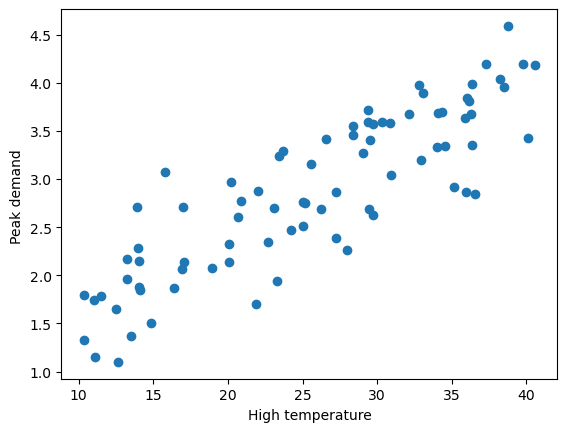

In [2]:
data = np.loadtxt('data.txt')
#data 第一列为温度信息 第二列为人口信息
X_raw = data[:,0].reshape(-1,1)
#data 第三列为用电量信息
Y = data[:,2].reshape(-1,1)
plt.xlabel('High temperature')
plt.ylabel('Peak demand ')
plt.scatter(X_raw,Y)
print('X shape:',X_raw.shape)
print('Y shape:',Y.shape)
print('some X[:5]:\n',X_raw[:5])
print('some Y[:5]:\n',Y[:5])

## 任务1

In [3]:
def preprocess_data(X):
    """输入预处理 在X前面加一列1
    参数：
        X:原始数据,shape为(m,1)
        
    返回：
        X_train: 在X加一列1的数据,shape为(m,2)
    """

    m = X.shape[0]   # m 是数据X的行数
    ### START CODE HERE ###
    
    one_column=np.ones((m,1))
    X_train=np.hstack((one_column,X))
    
    ### END CODE HERE ###
    return X_train

In [4]:
X = preprocess_data(X_raw)
print('new X shape:',X.shape)
print('Y shape:',Y.shape)
print('new X[:5,:]=\n',X[:5,:])
print('Y[:5,:]=\n',Y[:5,:])

new X shape: (80, 2)
Y shape: (80, 1)
new X[:5,:]=
 [[ 1.   38.24]
 [ 1.   36.53]
 [ 1.   32.92]
 [ 1.   26.59]
 [ 1.   20.05]]
Y[:5,:]=
 [[4.04]
 [2.84]
 [3.2 ]
 [3.42]
 [2.32]]


## 任务2

In [5]:
def init_parameter(shape):
    """初始化参数
    参数：
        shape: 参数形状
        
    返回：
        theta_init: 初始化后的参数
    """
    
    np.random.seed(0)
    m, n = shape
    ### START CODE HERE ###

    theta_init = np.random.rand(m,n)

    ### END CODE HERE ###
    
    return theta_init

In [6]:
theta = init_parameter((2,1))
print('theta shape is ',theta.shape)
print('theta = ',theta)

theta shape is  (2, 1)
theta =  [[0.5488135 ]
 [0.71518937]]


## 任务3

In [7]:
def compute_predict_Y(X,theta):
    """计算预测结果
    参数：
        X: 训练集数据特征,shape: (m, 2)
        theta: 参数,shape: (2, 1)

    返回：
        predict_Y: 预测结果,shape: (m,1)
    """
    
    ### START CODE HERE ###
    predict_Y = np.dot(X,theta)
    ### END CODE HERE ###
    return predict_Y
predict_Y = compute_predict_Y(X,theta)
print(predict_Y[:5])

[[27.89765487]
 [26.67468106]
 [24.09284744]
 [19.56569876]
 [14.8883603 ]]


## 任务4

In [8]:
def compute_J(predict_Y, Y):
    """计算损失的函数J
    参数：
        predict_Y: 预测结果,shape: (m, 1)
        Y: 训练集数据标签,shape: (m, 1)
        
    返回：
        loss: 损失值
    """
    
    m = Y.shape[0]
    
    ### START CODE HERE ###

    loss = np.sum(np.power(predict_Y-Y,2))/(2*m)
    
    ### END CODE HERE ###
    
    return loss

In [9]:
first_loss = compute_J(predict_Y, Y)
print("first_loss = ", first_loss)

first_loss =  144.05159786255672


## 任务5

In [10]:
def compute_gradient(predict_Y, Y, X):
    """计算对参数theta的梯度值
    参数：
        predict_Y: 当前预测结果,shape: (m,1)
        Y: 训练集数据标签,shape: (m, 1)
        X: 训练集数据特征,shape: (m, 2)
        
    返回：
        gradients: 对theta的梯度,shape:(2,1)
    """
    
    m = X.shape[0]
    
    ### START CODE HERE ###

    gradients = (1/m)*np.dot(X.T,(predict_Y-Y))

    ### END CODE HERE ###
    
    return gradients

In [11]:
gradients_first = compute_gradient(predict_Y, Y, X)
print("gradients_first shape : ", gradients_first.shape)
print("gradients_first = ", gradients_first)

gradients_first shape :  (2, 1)
gradients_first =  [[ 16.0079445 ]
 [459.96770081]]


## 任务6

In [12]:
def update_parameters(theta, gradients, learning_rate=0.0001):
    """更新参数theta
    参数：
        theta: 参数,shape: (2, 1)
        gradients: 梯度,shape: (2, 1)
        learning_rate: 学习率,默认为0.0001
        
    返回：
        parameters: 更新后的参数,shape: (2, 1)
    """
    ### START CODE HERE ###

    parameters = theta-learning_rate*gradients

    ### END CODE HERE ###
    
    return parameters

In [13]:
theta_one_iter = update_parameters(theta, gradients_first)

print("theta_one_iter = ", theta_one_iter)

theta_one_iter =  [[0.54721271]
 [0.6691926 ]]


## 任务7

In [14]:
def model(X, Y, theta, iter_num = 100, learning_rate=0.0001):
    """线性回归模型
    参数：
        X: 训练集数据特征,shape: (m, n+1)
        Y: 训练集数据标签,shape: (m, 1)
        iter_num: 梯度下降的迭代次数
        theta: 初始化的参数,shape: (n+1, 1)
        learning_rate: 学习率,默认为0.0001
        
    返回：
        loss_history: 每次迭代的损失值
        theta_history: 每次迭代更新后的参数
        theta: 训练得到的参数
    """
    
    loss_history = []
    theta_history = []
    
    for i in range(iter_num):
        
        ### START CODE HERE ###
        # 预测
        predict_Y = compute_predict_Y(X,theta)
        # 计算损失
        loss = compute_J(predict_Y,Y)
        # 计算梯度
        gradients = compute_gradient(predict_Y,Y,X)
        # 更新参数
        theta = update_parameters(theta,gradients,learning_rate)
        ### END CODE HERE ###
        
        loss_history.append(loss)
        theta_history.append(theta)
    
    return loss_history, theta_history, theta


theta =  [[0.52732144]
 [0.09027749]]
loss =  0.09087253295782578


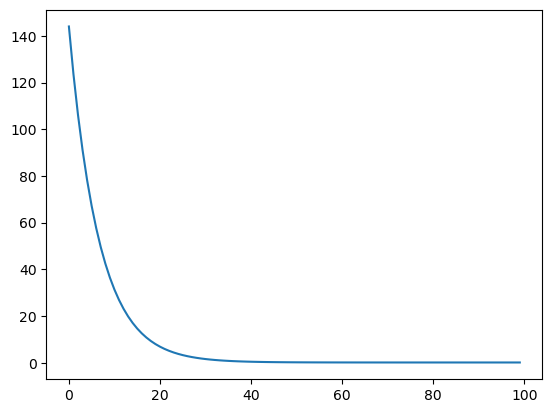

In [15]:
loss_history, theta_history, theta = model(X, Y, theta, iter_num=100, learning_rate=0.0001)

print("theta = ", theta)

plt.plot(loss_history)
print("loss = ", loss_history[-1])

学习到的线性模型与原始数据的关系可视化

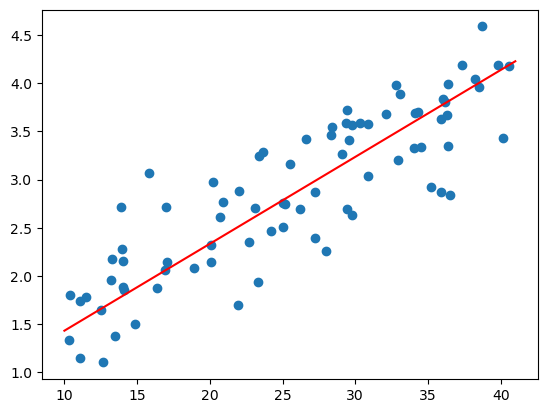

In [16]:
plt.scatter(X[:,1],Y)
x = np.arange(10,42)
plt.plot(x,x*theta[1][0]+theta[0][0],'r')

直观地了解一下梯度下降的过程

(50, 50)
(50, 50)
(80, 1)
(50, 50)


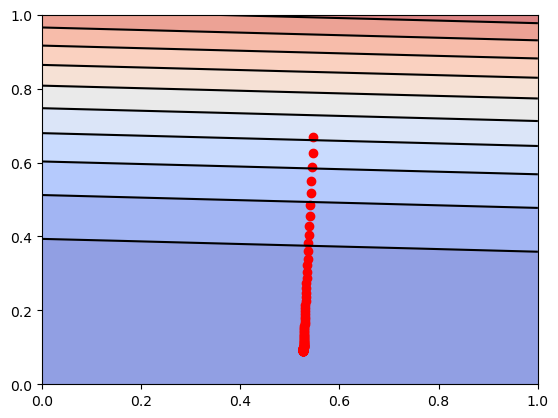

In [17]:
theta_0 = np.linspace(0, 1, 50)
theta_1 = np.linspace(0, 1, 50)
theta_0, theta_1 = np.meshgrid(theta_0,theta_1)
J = np.zeros_like(theta_0)
predict_Ys = np.zeros_like(predict_Y)
print(theta_0.shape)
print(theta_1.shape)
print(predict_Ys.shape)
print(J.shape)

for i in range(50):
    for j in range(50):
        predict_Y = compute_predict_Y(X, np.array([[theta_0[i,j]],[theta_1[i,j]]]))
        J[i,j] = compute_J(predict_Y, Y)

plt.contourf(theta_0, theta_1, J, 10, alpha = 0.6, cmap = plt.cm.coolwarm)
C = plt.contour(theta_0, theta_1, J, 10, colors = 'black')

# 画出损失函数J的历史位置
history_num = len(theta_history)
theta_0_history = np.zeros(history_num)
theta_1_history = np.zeros(history_num)
for i in range(history_num):
    theta_0_history[i],theta_1_history[i] = theta_history[i][0,0],theta_history[i][1,0]
plt.scatter(theta_0_history, theta_1_history, c="r")

## 任务8

theta =  [[0.52593585]
 [0.06715361]
 [0.57583208]]
loss =  0.10300473270580186


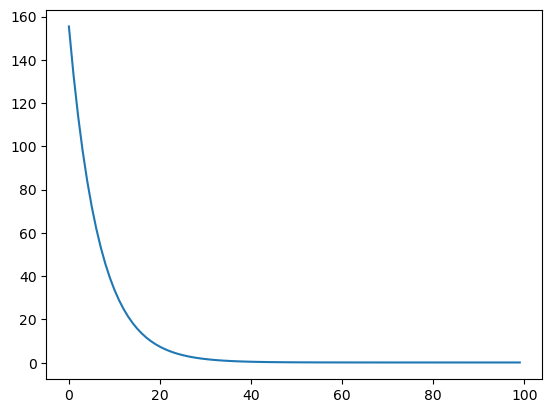

In [18]:
#读取数据，X取data的前两列
X = data[:,0:2].reshape(-1, 2)
Y = data[:,2].reshape(-1, 1)

### START CODE HERE ###

# 直接调用上面实现过的函数
# 同样为X的前面添加一列1,使得X的shape从80x2 -> 80x3
X = preprocess_data(X)
# 初始化参数theta ,theta的shape应为 3x1
theta = init_parameter((3,1))
# 传入模型训练,learning_rate设为0.0001
loss_history, theta_history, theta = model(X,Y,theta,iter_num=100,learning_rate=0.0001)

### END CODE HERE ###

print("theta = ", theta)

plt.plot(loss_history)
print("loss = ", loss_history[-1])

## 任务9

mu =  [25.617  1.131]
sigma =  [8.8648434 0.3606716]
theta =  [[2.86181356]
 [0.70424286]
 [0.04097817]]
loss =  0.08591601385802586


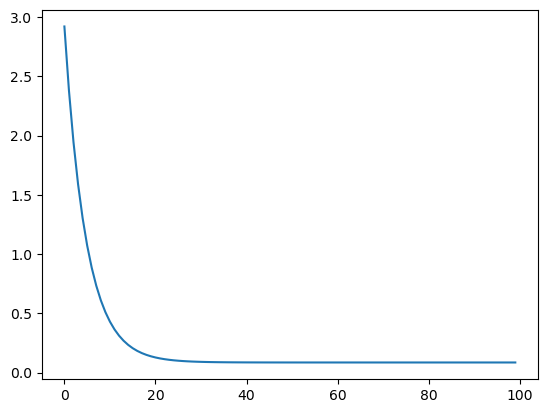

In [19]:
X = data[:,0:2].reshape((-1, 2))
Y = data[:,2].reshape((-1, 1))

### START CODE HERE ###

# 计算特征的均值 mu
mu = np.mean(X,axis=0)
# 计算特征的标准差 sigma
sigma = np.std(X,axis=0)
# 零均值单位方差归一化
X_norm = (X-mu)/sigma

# 训练多变量回归模型
# X_norm前面加一列1
X = preprocess_data(X_norm)
# 初始化参数theta
theta = init_parameter((3,1))
# 传入模型训练,learning_rate设为0.1
loss_history, theta_history, theta = model(X,Y,theta,iter_num=100,learning_rate=0.1)

### END CODE HERE ###

print("mu = ", mu)
print("sigma = ", sigma)

print("theta = ", theta)

plt.plot(loss_history)
print("loss = ", loss_history[-1])

直观地了解特征尺度归一化的梯度下降的过程

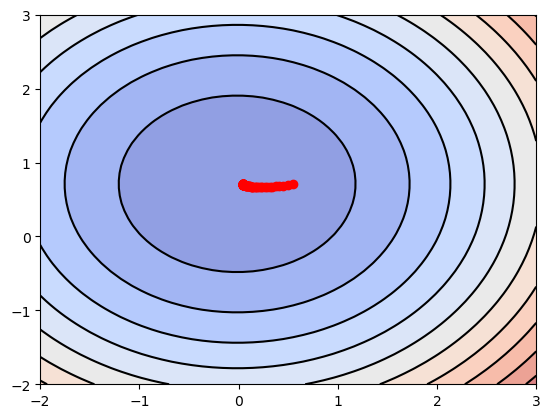

In [20]:
X_show = X[:,0:2]
X_show = preprocess_data(X_show)

theta_0 = np.linspace(-2, 3, 50)
theta_1 = np.linspace(-2, 3, 50)
theta_0, theta_1 = np.meshgrid(theta_0,theta_1)
J = np.zeros_like(theta_0)

for i in range(50):
    for j in range(50):
        predict_Y = compute_predict_Y(X_show, np.array([[2.877],[theta_0[i,j]],[theta_1[i,j]]]))
        J[i,j] = compute_J(predict_Y, Y)

plt.contourf(theta_0, theta_1, J, 10, alpha = 0.6, cmap = plt.cm.coolwarm)
C = plt.contour(theta_0, theta_1, J, 10, colors = 'black')

# 画出损失函数J的历史位置
history_num = len(theta_history)
theta_0_history = np.zeros(history_num)
theta_1_history = np.zeros(history_num)
for i in range(history_num):
    theta_0_history[i],theta_1_history[i] = theta_history[i][2,0],theta_history[i][1,0]
plt.scatter(theta_0_history, theta_1_history, c="r")

## 任务10

In [21]:
def normal_equation(X, Y):
    """法线方程求解线性回归方程的参数
    参数：
        X: 训练集数据特征,shape: (m, n+1)
        Y: 训练集数据标签,shape: (m, 1)
        
    返回：
        theta: 线性回归方程的参数
    """
    
    ### START CODE HERE ###
        
    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),Y)

    ### END CODE HERE ###
    
    return theta

In [22]:
theta = normal_equation(X, Y)

print("theta = ", theta)

theta =  [[2.861875  ]
 [0.70429906]
 [0.04092011]]


## 任务11

In [23]:
def predict(theta,x):
    """预测峰值用电量
    参数：
        X: 需要预测数据的特征,shape: (m, n+1), 这里只预测一天的结果, m=1
        theta: 最终确定的参数,shape: (n+1, 1)
        
    返回：
        prediction: 预测结果,shape: (m, 1)
    """

    ### START CODE HERE ###

    # 零均值单位方差归一化
    x = (x-mu)/sigma
    # 在x前面加一列
    x = preprocess_data(x)
    #用theta和处理后的x计算预测值
    prediction = compute_predict_Y(x,theta)

    ### END CODE HERE ###

    return prediction

In [24]:
#明天的特征
x = np.array([[40,3.3]])
print('预计明天的峰值用电量为：%.2f GW'%(predict(theta,x))) 

预计明天的峰值用电量为：4.25 GW


## 任务12

导入另一组数据，线性模型效果不好

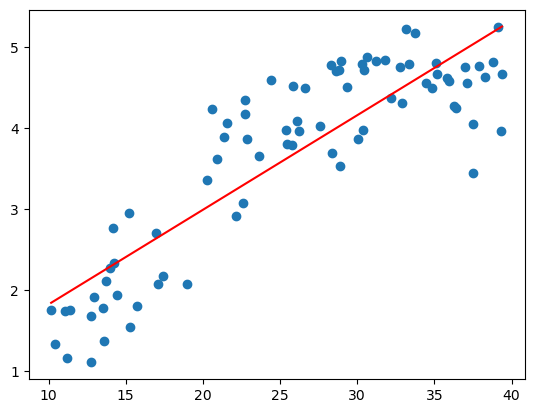

In [25]:
data1 = np.loadtxt('data1.txt')
X = data1[:,0].reshape(-1,1)
Y = data1[:,1].reshape(-1,1)

plt.scatter(X,Y)
X = np.hstack((np.ones((X.shape[0],1)),X))
theta = normal_equation(X,Y)
plt.plot(np.sort(X[:,1]),np.dot(X,theta)[np.argsort(X[:,1])],'r')

多项式回归

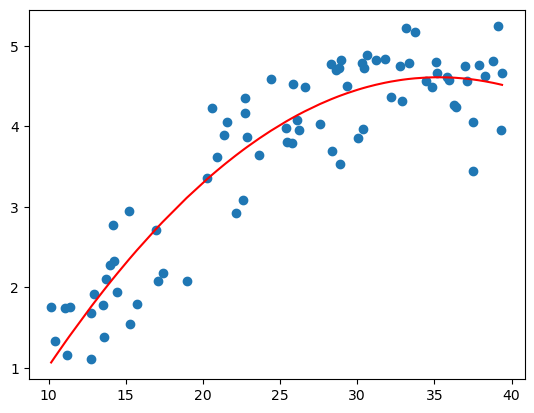

In [26]:
data1 = np.loadtxt('data1.txt')
X = data1[:,0].reshape(-1,1)
Y = data1[:,1].reshape(-1,1)

m = X.shape[0]    # m 是数据X的行数
X_square = np.power(X,2)

### START CODE HERE ###

# 对X 前面加1， 后面加平方，变为 m x 3 的矩阵
X = np.hstack((X,np.power(X,2)))
X = np.hstack((np.ones((m,1)),X))


# 用法线方程求解theta
theta = normal_equation(X, Y)

### END CODE HERE ###

plt.scatter(X[:,1],Y)
plt.plot(np.sort(X[:,1]),np.dot(X,theta)[np.argsort(X[:,1])],'r')

## Optional sklearn

In [27]:
import matplotlib.pyplot as plt
plt.rcParams["font.sans-serif"]=["SimHei"] #设置字体
plt.rcParams["axes.unicode_minus"]=False #该语句解决图像中的“-”负号的乱码问题


data = np.loadtxt("data.txt")
# data 数据第一列为人口信息
X_data = data[:, 0].reshape(-1,1)
# data 数据第三列为城市峰值用电量
y_data = data[:, 2].reshape(-1,1)
print("X shape: ", X_data.shape)
print("y shape: ", y_data.shape)

X shape:  (80, 1)
y shape:  (80, 1)


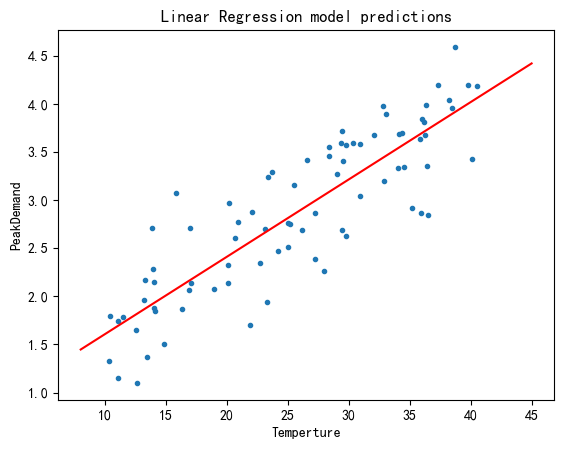

In [28]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()

linear_reg.fit(X_data, y_data)

X_test = np.array([[8], [45]])
y_pred = linear_reg.predict(X_test)
plt.plot(X_data,y_data,".")
plt.plot(X_test, y_pred,"r-")
plt.xlabel("Temperture")
plt.ylabel("PeakDemand")
plt.title("Linear Regression model predictions")
plt.show()